In [1]:
import numpy as np
import pandas as pd,os
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
import scikit_posthocs as sp
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
from library.utils import read_data

In [7]:
METRIC_TO_DROP = 'pr_rec_score' #pr_rec_score, matthews_corrcoef
ipf = pd.read_csv("IPF.csv",header=[0,1,2],index_col=0)
ipf = ipf.drop(columns=['rboost_DT','rboost_NB'],level=1)
ipf = ipf.drop(columns=[METRIC_TO_DROP],level=2).droplevel(2,axis=1) 
ipf = ipf.drop(columns=['ens'],level=0) 
print(f"ipf:{ipf.shape}")

ipf:(32, 30)


In [27]:
ihf = pd.read_csv("IHFilter_Final.csv",header=[0,1,2],index_col=0)
ihf = ihf.drop(columns=[METRIC_TO_DROP],level=2).droplevel(2,axis=1) 
ihf = ihf.drop(columns=['Spyder'],level=0) 
print(f"ihf:{ihf.shape}")

ihf:(32, 30)


In [33]:
clni = pd.read_csv("CLNI.csv",header=[0,1,2],index_col=0)
#clni = clni.drop(columns=[c[0] for c in clni.columns if 'ens' in c[0]],level=0)
clni = clni.drop(columns=[METRIC_TO_DROP],level=2).droplevel(2,axis=1) 
clni = clni.drop(columns=['Spyder'],level=0) 
print(f"clni:{clni.shape}")

clni:(32, 30)


In [34]:
clni.columns

MultiIndex([( 'smote',  'dt'),
            ( 'smote',  'lr'),
            ( 'smote',  'nb'),
            ( 'smote', 'svm'),
            ( 'smote', 'knn'),
            ( 'smote',  'rf'),
            (   'rus',  'dt'),
            (   'rus',  'lr'),
            (   'rus',  'nb'),
            (   'rus', 'svm'),
            (   'rus', 'knn'),
            (   'rus',  'rf'),
            ('wilson',  'dt'),
            ('wilson',  'lr'),
            ('wilson',  'nb'),
            ('wilson', 'svm'),
            ('wilson', 'knn'),
            ('wilson',  'rf'),
            ( 'tomek',  'dt'),
            ( 'tomek',  'lr'),
            ( 'tomek',  'nb'),
            ( 'tomek', 'svm'),
            ( 'tomek', 'knn'),
            ( 'tomek',  'rf'),
            (  'None',  'dt'),
            (  'None',  'lr'),
            (  'None',  'nb'),
            (  'None', 'svm'),
            (  'None', 'knn'),
            (  'None',  'rf')],
           names=['imb', 'clf'])

(384, 3)


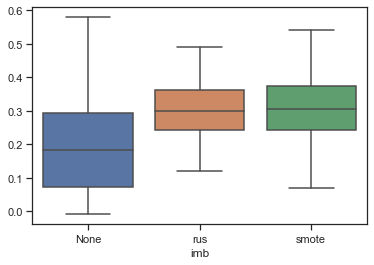

In [36]:
boo = ipf.stack().reset_index(drop=True)
tmp = pd.concat((boo[['None','rus','smote']],boo[['None','rus','smote']]),axis=0)
print(tmp.shape)
sns.boxplot(data=tmp);

In [128]:
from library.utils import read_data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
X,yn,yr = read_data('jruby-1.5.0.csv')
X = StandardScaler().fit_transform(X)
idx = yn==1
real = yr[idx]
TP = (yn==1) & (yr==1)
FP = (yn==1) & (yr==0)
print(TP.sum(),FP.sum())

jruby-1.5.0.csv noise:0.218, imb:3.098,276,855, Shape:(1131, 65)
56 220


In [120]:
pca = PCA(n_components=2).fit(X)
Xp = pca.transform(X)
pca.explained_variance_ratio_

array([0.47032073, 0.09976393])

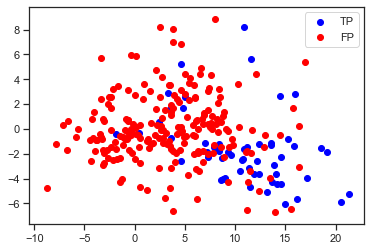

In [121]:
plt.scatter(Xp[TP,0],Xp[TP,1],color='blue',label='TP');
plt.scatter(Xp[FP,0],Xp[FP,1],color='red',label='FP');
plt.legend();

In [122]:
from sklearn.neighbors import KNeighborsClassifier
K = 5
Xnew,purity = [],[]
freq = np.bincount(yn)
print(freq)
knn = KNeighborsClassifier(n_neighbors=K).fit(X,yn)
dist,ind = knn.kneighbors()
pos_idx = np.argwhere(yn==1).reshape(-1)
print(ind.shape)
for i in range(freq.max()-freq.min()):
    idx = np.random.choice(pos_idx,size=(2,),replace=True)
    p1,p2 = X[idx[0]],X[idx[1]]
    v = (yr[idx[0]] + yr[idx[1]])/2
    a = np.random.uniform()
    x = a*p1 + (1-a)*p2
    Xnew.append(x)
    purity.append(v)
Xnew = np.array(Xnew)
purity = np.array(purity)
Xnew.shape,purity.shape

[855 276]
(1131, 5)


((579, 65), (579,))

(1710, 65)
[0.50783787 0.0930925 ]


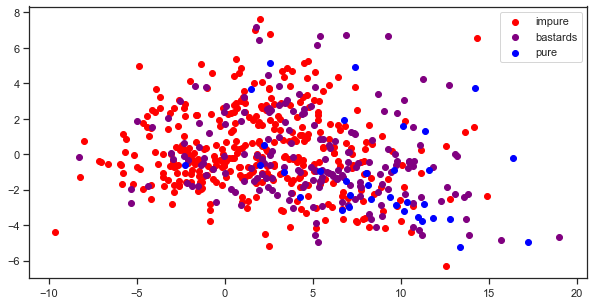

In [132]:
XX = np.vstack((X,Xnew))
print(XX.shape)
pca = PCA(n_components=2).fit(XX)
Xns = pca.transform(Xnew)
print(pca.explained_variance_ratio_)
plt.figure(figsize=(10,5))
plt.scatter(Xns[purity==0.0,0],Xns[purity==0.0,1],c='red',label='impure');
plt.scatter(Xns[purity==0.5,0],Xns[purity==0.5,1],c='purple',label='bastards');
plt.scatter(Xns[purity==1.0,0],Xns[purity==1.0,1],c='blue',label='pure');
plt.legend();

In [133]:
(purity==0).sum(),(purity==0.5).sum(),(purity==1.0).sum()

(357, 188, 34)

In [65]:
ipf.index

Index(['activemq-5.8.0.csv', 'groovy-1_6_BETA_1.csv', 'activemq-5.3.0.csv',
       'wicket-1.3.0-incubating-beta-1.csv', 'jruby-1.1.csv',
       'jruby-1.4.0.csv', 'lucene-2.3.0.csv', 'hbase-0.95.2.csv',
       'lucene-3.0.0.csv', 'camel-2.9.0.csv', 'wicket-1.5.3.csv',
       'lucene-3.1.csv', 'groovy-1_6_BETA_2.csv', 'activemq-5.2.0.csv',
       'groovy-1_5_7.csv', 'hbase-0.95.0.csv', 'camel-2.11.0.csv',
       'jruby-1.7.0.preview1.csv', 'hive-0.10.0.csv', 'camel-2.10.0.csv',
       'derby-10.2.1.6.csv', 'jruby-1.5.0.csv', 'derby-10.3.1.4.csv',
       'lucene-2.9.0.csv', 'hbase-0.94.0.csv', 'camel-1.4.0.csv',
       'activemq-5.1.0.csv', 'activemq-5.0.0.csv', 'derby-10.5.1.1.csv',
       'wicket-1.3.0-beta2.csv', 'hive-0.12.0.csv', 'hive-0.9.0.csv'],
      dtype='object')